In [3]:
# fmt: off
COORDS = [
    (456, 320),  # location 0 - the depot
    (228, 0),    # location 1
    (912, 0),    # location 2
    (0, 80),     # location 3
    (114, 80),   # location 4
    (570, 160),  # location 5
    (798, 160),  # location 6
    (342, 240),  # location 7
    (684, 240),  # location 8
    (570, 400),  # location 9
    (912, 400),  # location 10
    (114, 480),  # location 11
    (228, 480),  # location 12
    (342, 560),  # location 13
    (684, 560),  # location 14
    (0, 640),    # location 15
    (798, 640),  # location 16
]
DEMANDS = [0, 1, 1, 2, 4, 2, 4, 8, 8, 1, 2, 1, 2, 4, 4, 8, 8]
# fmt: on

In [4]:
from pyvrp import Model

m = Model()
m.add_vehicle_type(4, capacity=15)
depot = m.add_depot(x=COORDS[0][0], y=COORDS[0][1])
clients = [
    m.add_client(x=COORDS[idx][0], y=COORDS[idx][1], delivery=DEMANDS[idx])
    for idx in range(1, len(COORDS))
]

locations = [depot] + clients
for frm in locations:
    for to in locations:
        distance = abs(frm.x - to.x) + abs(frm.y - to.y)  # Manhattan
        m.add_edge(frm, to, distance=distance)

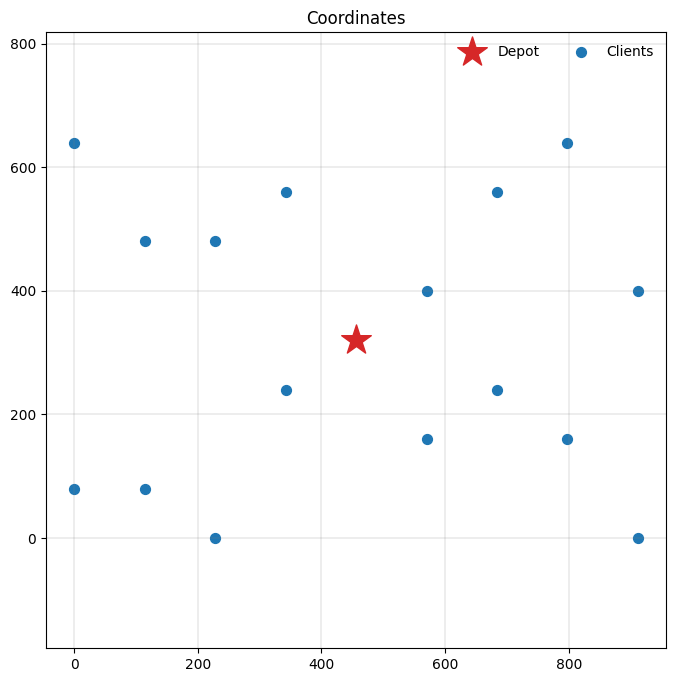

In [5]:
import matplotlib.pyplot as plt

from pyvrp.plotting import plot_coordinates

_, ax = plt.subplots(figsize=(8, 8))
plot_coordinates(m.data(), ax=ax)

In [13]:
from pyvrp.stop import MaxRuntime

res = m.solve(stop=MaxRuntime(2), display=True)  # one second

PyVRP v0.8.2

Solving an instance with:
    1 depot
    16 clients
    4 vehicles (1 vehicle type)

                  |       Feasible        |      Infeasible
    Iters    Time |   #      Avg     Best |   #      Avg     Best
H     500      1s |  27     6208     6208 |  34     7134     6138
     1000      1s |  38     6208     6208 |  35     6806     5874
     1500      2s |  32     6221     6208 |  65     6442     5874

Search terminated in 2.00s after 1812 iterations.
Best-found solution has cost 6208.



In [15]:
print(res)

Solution results
    # routes: 4
   # clients: 16
   objective: 6208.00
# iterations: 1812
    run-time: 2.00 seconds

Routes
------
Route #1: 7 1 3 4 
Route #2: 5 6 2 8 
Route #3: 14 16 10 9 
Route #4: 13 15 11 12 



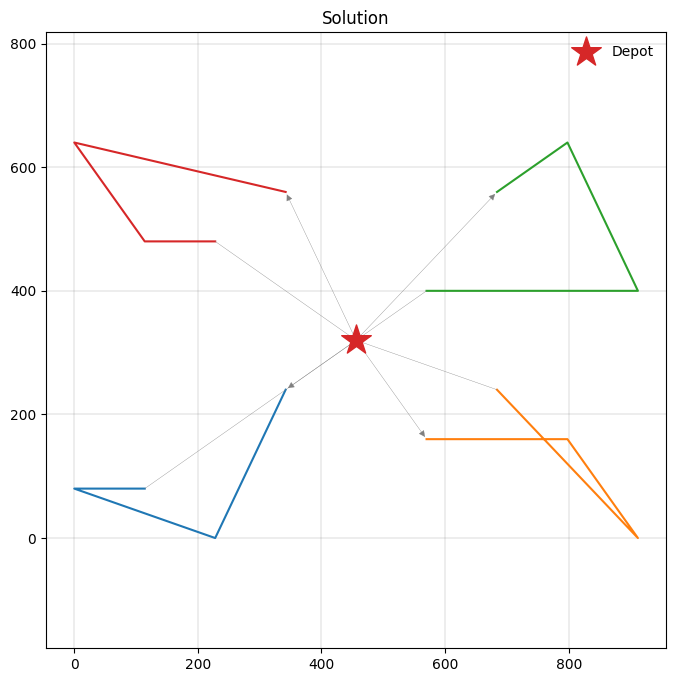

In [16]:
from pyvrp.plotting import plot_solution

_, ax = plt.subplots(figsize=(8, 8))
plot_solution(res.best, m.data(), ax=ax)

In [4]:
pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.3/10.6 MB 4.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/10.6 MB 6.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/10.6 MB 9.3 MB/s eta 0:00:01
   -------- ------------------------------- 2.3/10.6 MB 11.1 MB/s eta 0:00:01
   ------------ --------------------------- 3.2/10.6 MB 12.7 MB/s eta 0:00:01
   --------------- ------------------------ 4.0/10.6 MB 13.5 MB/s eta 0:00:01
   ------------------- -------------------- 5.1/10.6 MB 15.5 MB/s eta 0:00:01
   ---------------------- ----------------- 6.1/10.6 MB 16.2 MB/s eta 0:00:01
   -------------------------- ------------- 7.1/10.6 MB 17.5 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.6 MB 18.4 MB/s eta 0:00:01
   ------------------------------------ --- 9.6/10.6 MB 19.8 MB/s eta 0:00:0